## 1 Exploratory Data Analysis

This script is focused on analysing the data composition:

- Data Types/Encoding
- Distribution/Skewness/Outliers
- Numerical/Categorical Features
- Missing Values
- Correlation/Importance to Target
- Cardinality of Categorical Features

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import boxcox, skew
from sklearn.preprocessing import PowerTransformer

pd.pandas.set_option('display.max_columns', None)

In [37]:
df = pd.read_csv('Life_Expectancy_Data.csv')
print(df.shape)
df.head()

(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


> Column names are dirty/unsanitised and needs to be renamed properly

In [38]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.title()
df.columns = df.columns.str.replace(" ", "_")
df.rename(columns={'Under-Five_Deaths': 'Under_Five_Deaths', 'Thinness__1-19_Years': 'Thinness_1to19', 
                   'Thinness_5-9_Years':'Thinness_5to9', 'Income_Composition_Of_Resources':'Income_Composition'}, inplace=True)
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'Bmi', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'Hiv/Aids', 'Gdp', 'Population', 'Thinness_1to19',
       'Thinness_5to9', 'Income_Composition', 'Schooling'],
      dtype='object')

In [14]:
df.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,Bmi,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness_1to19,Thinness_5to9,Income_Composition,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


> Reorder target variable to end of dataframe for convenience

In [39]:
TARGET_VAR = 'Life_Expectancy'
df = df[[var for var in df.columns if var != TARGET_VAR] + [TARGET_VAR]]
df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,Bmi,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness_1to19,Thinness_5to9,Income_Composition,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [ ]:
#df = df.dropna(subset=['Life_Expectancy'])  # remove entries with null target labels
#df.to_csv('life_expectancy.csv', index=False)

### Target variable

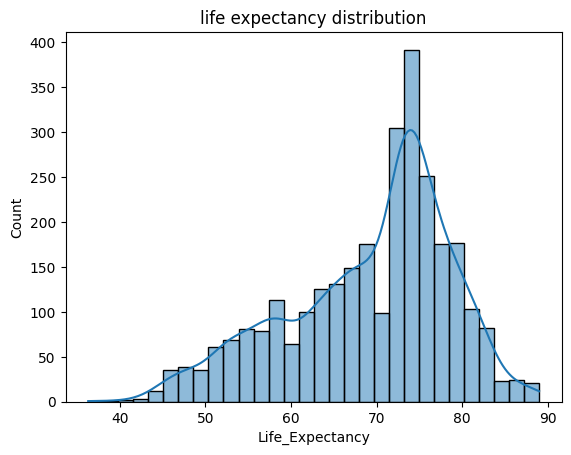

In [7]:
sns.histplot(df['Life_Expectancy'], kde=True)
plt.title('life expectancy distribution')
plt.show()

In [16]:
df['Life_Expectancy'].skew()

np.float64(-0.6386047358773552)

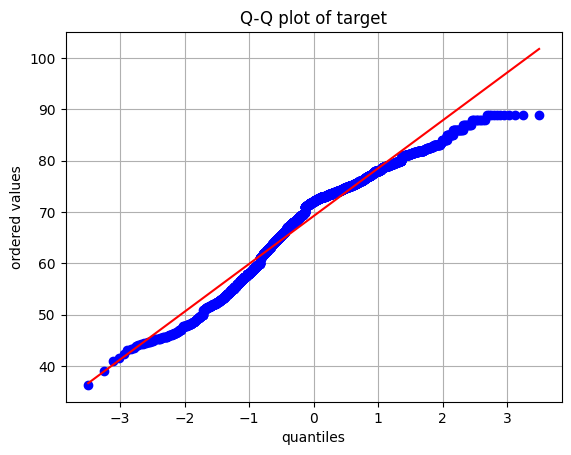

In [131]:
target = df[TARGET_VAR].dropna()
stats.probplot(target, dist="norm", plot=plt)

plt.title('Q-Q plot of target')
plt.xlabel('quantiles')
plt.ylabel('ordered values')
plt.grid(True)
plt.show()

> Life_Expectancy is moderately left-skewed but not severe. There is no need to transform if the model to be used is tree-based, however in case of bad performance and cross validation of several models, every skew will be transformed in the pipeline to cater to models that are sensitive to skewness

#### `Square transform`

-0.34807627406832525


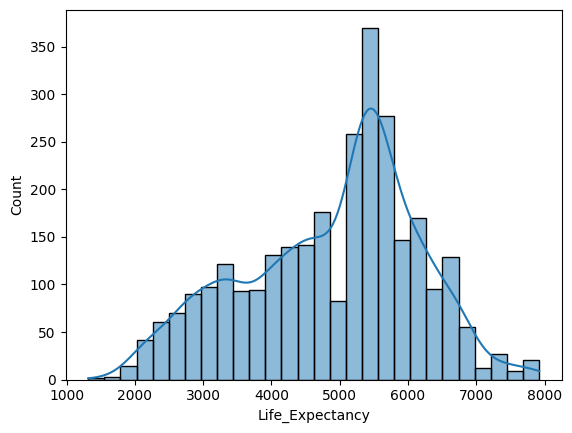

In [17]:
tmp = df.copy()
tmp['Life_Expectancy'] = tmp['Life_Expectancy'] ** 2

print(tmp['Life_Expectancy'].skew())
sns.histplot(tmp['Life_Expectancy'], kde=True)
plt.show()

#### `Yeo-Johnson transform`

-0.10604246262580315


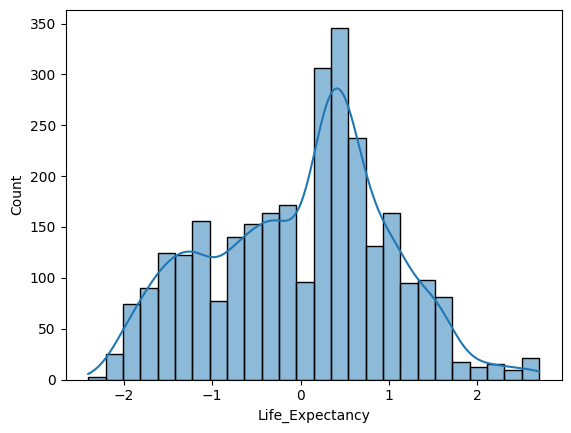

In [18]:
powerTrans = PowerTransformer(method='yeo-johnson')
tmp = df.copy()
tmp = tmp.dropna(subset=['Life_Expectancy'])
tmp[['Life_Expectancy']] = powerTrans.fit_transform(tmp[['Life_Expectancy']])

print(tmp['Life_Expectancy'].skew())
sns.histplot(tmp['Life_Expectancy'], kde=True)
plt.show()

> Yeo-Johnson transformation yields the closest to normal distribution for a right-skewed data. This may require inverse transformation for predicted values to revert back to original scale.

### Missing data

In [40]:
missing = [var for var in df.columns if df[var].isnull().sum() > 0]
missing

['Adult_Mortality',
 'Alcohol',
 'Hepatitis_B',
 'Bmi',
 'Polio',
 'Total_Expenditure',
 'Diphtheria',
 'Gdp',
 'Population',
 'Thinness_1to19',
 'Thinness_5to9',
 'Income_Composition',
 'Schooling',
 'Life_Expectancy']

> There are 14 columns with missing data and this includes the target column. In this case, the rows with empty target values should be dropped. Other features that are empty but have target values should be imputed.

In [41]:
missing_target = df['Life_Expectancy'].isnull().sum()
missing_target

np.int64(10)

> There are 10 rows where the target label is missing.

In [42]:
df[df['Life_Expectancy'].isnull()]

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,Bmi,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness_1to19,Thinness_5to9,Income_Composition,Schooling,Life_Expectancy
624,Cook Islands,2013,Developing,NaN,0,0.01,0.000000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN,NaN
769,Dominica,2013,Developing,NaN,0,0.01,11.419555,96.0,0,58.4,0,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7,NaN
1650,Marshall Islands,2013,Developing,NaN,0,0.01,871.878317,8.0,0,81.6,0,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0,NaN
1715,Monaco,2013,Developing,NaN,0,0.01,0.000000,99.0,0,NaN,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,0,0.01,15.606596,87.0,0,87.3,0,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6,NaN
1909,Niue,2013,Developing,NaN,0,0.01,0.000000,99.0,0,77.3,0,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN,NaN
1958,Palau,2013,Developing,NaN,0,NaN,344.690631,99.0,0,83.3,0,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2,NaN
2167,Saint Kitts and Nevis,2013,Developing,NaN,0,8.54,0.000000,97.0,0,5.2,0,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4,NaN
2216,San Marino,2013,Developing,NaN,0,0.01,0.000000,69.0,0,NaN,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1,NaN
2713,Tuvalu,2013,Developing,NaN,0,0.01,78.281203,9.0,0,79.3,0,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0,NaN


In [43]:
missing_num = [var for var in df.columns if df[var].isnull().sum() > 0 and df[var].dtype != 'O']
missing_num

['Adult_Mortality',
 'Alcohol',
 'Hepatitis_B',
 'Bmi',
 'Polio',
 'Total_Expenditure',
 'Diphtheria',
 'Gdp',
 'Population',
 'Thinness_1to19',
 'Thinness_5to9',
 'Income_Composition',
 'Schooling',
 'Life_Expectancy']

In [23]:
# % missing values for each numerical column
df[missing_num].isnull().mean().sort_values(ascending=False)

Population            0.221920
Hepatitis_B           0.188223
Gdp                   0.152485
Total_Expenditure     0.076923
Alcohol               0.066031
Income_Composition    0.056841
Schooling             0.055480
Thinness_5to9         0.011572
Bmi                   0.011572
Thinness_1to19        0.011572
Diphtheria            0.006467
Polio                 0.006467
Adult_Mortality       0.003404
Life_Expectancy       0.003404
dtype: float64

In [49]:
missing_cat = [var for var in df.columns if df[var].isnull().sum() > 0 and var not in missing_num]
missing_cat

[]

> All missing data are from numerical columns

### Numerical features

In [44]:
num_var = [var for var in df.columns if df[var].dtype != 'O' and var != TARGET_VAR]
print(len(num_var))
num_var

19


['Year',
 'Adult_Mortality',
 'Infant_Deaths',
 'Alcohol',
 'Percentage_Expenditure',
 'Hepatitis_B',
 'Measles',
 'Bmi',
 'Under_Five_Deaths',
 'Polio',
 'Total_Expenditure',
 'Diphtheria',
 'Hiv/Aids',
 'Gdp',
 'Population',
 'Thinness_1to19',
 'Thinness_5to9',
 'Income_Composition',
 'Schooling']

> There are 19 numerical features excluding the target column

#### `Numerical - Discrete`

In [51]:
discrete_var = [var for var in num_var if len(df[var].unique()) < 20]
print(len(discrete_var), 'discrete vars')
df[discrete_var].head()

1 discrete vars


,Year
0,2015
1,2014
2,2013
3,2012
4,2011


> There is one discrete variable (Year), the rest are continuous

#### `Numerical - Continuous`

In [52]:
cont_var = [var for var in num_var if var not in discrete_var]
print(len(cont_var), 'continuous vars')
df[cont_var].head()

18 continuous vars


,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,Bmi,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness_1to19,Thinness_5to9,Income_Composition,Schooling
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### Skewness

In [53]:
skew = df[num_var].skew().sort_values(ascending=False)
skew

Population                15.916236
Infant_Deaths              9.786963
Under_Five_Deaths          9.495065
Measles                    9.441332
Hiv/Aids                   5.396112
Percentage_Expenditure     4.652051
Gdp                        3.206655
Thinness_5to9              1.777424
Thinness_1to19             1.711471
Adult_Mortality            1.174369
Total_Expenditure          0.618686
Alcohol                    0.589563
Year                      -0.006409
Bmi                       -0.219312
Schooling                 -0.602437
Income_Composition        -1.143763
Hepatitis_B               -1.930845
Diphtheria                -2.072753
Polio                     -2.098053
dtype: float64

> Most features have moderate/severe skewness, `median` impute should be used instead of mean since it is sensitive and outliers can distort the resulting value.

In [29]:
def histograms(data, var):
    numeric_cols = data[var].columns
    n_cols = 4
    n_rows = -(-len(numeric_cols) // n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(data[col], kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f'{col}')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    fig.savefig('num_hist.png', dpi=300, bbox_inches='tight')
    plt.show()

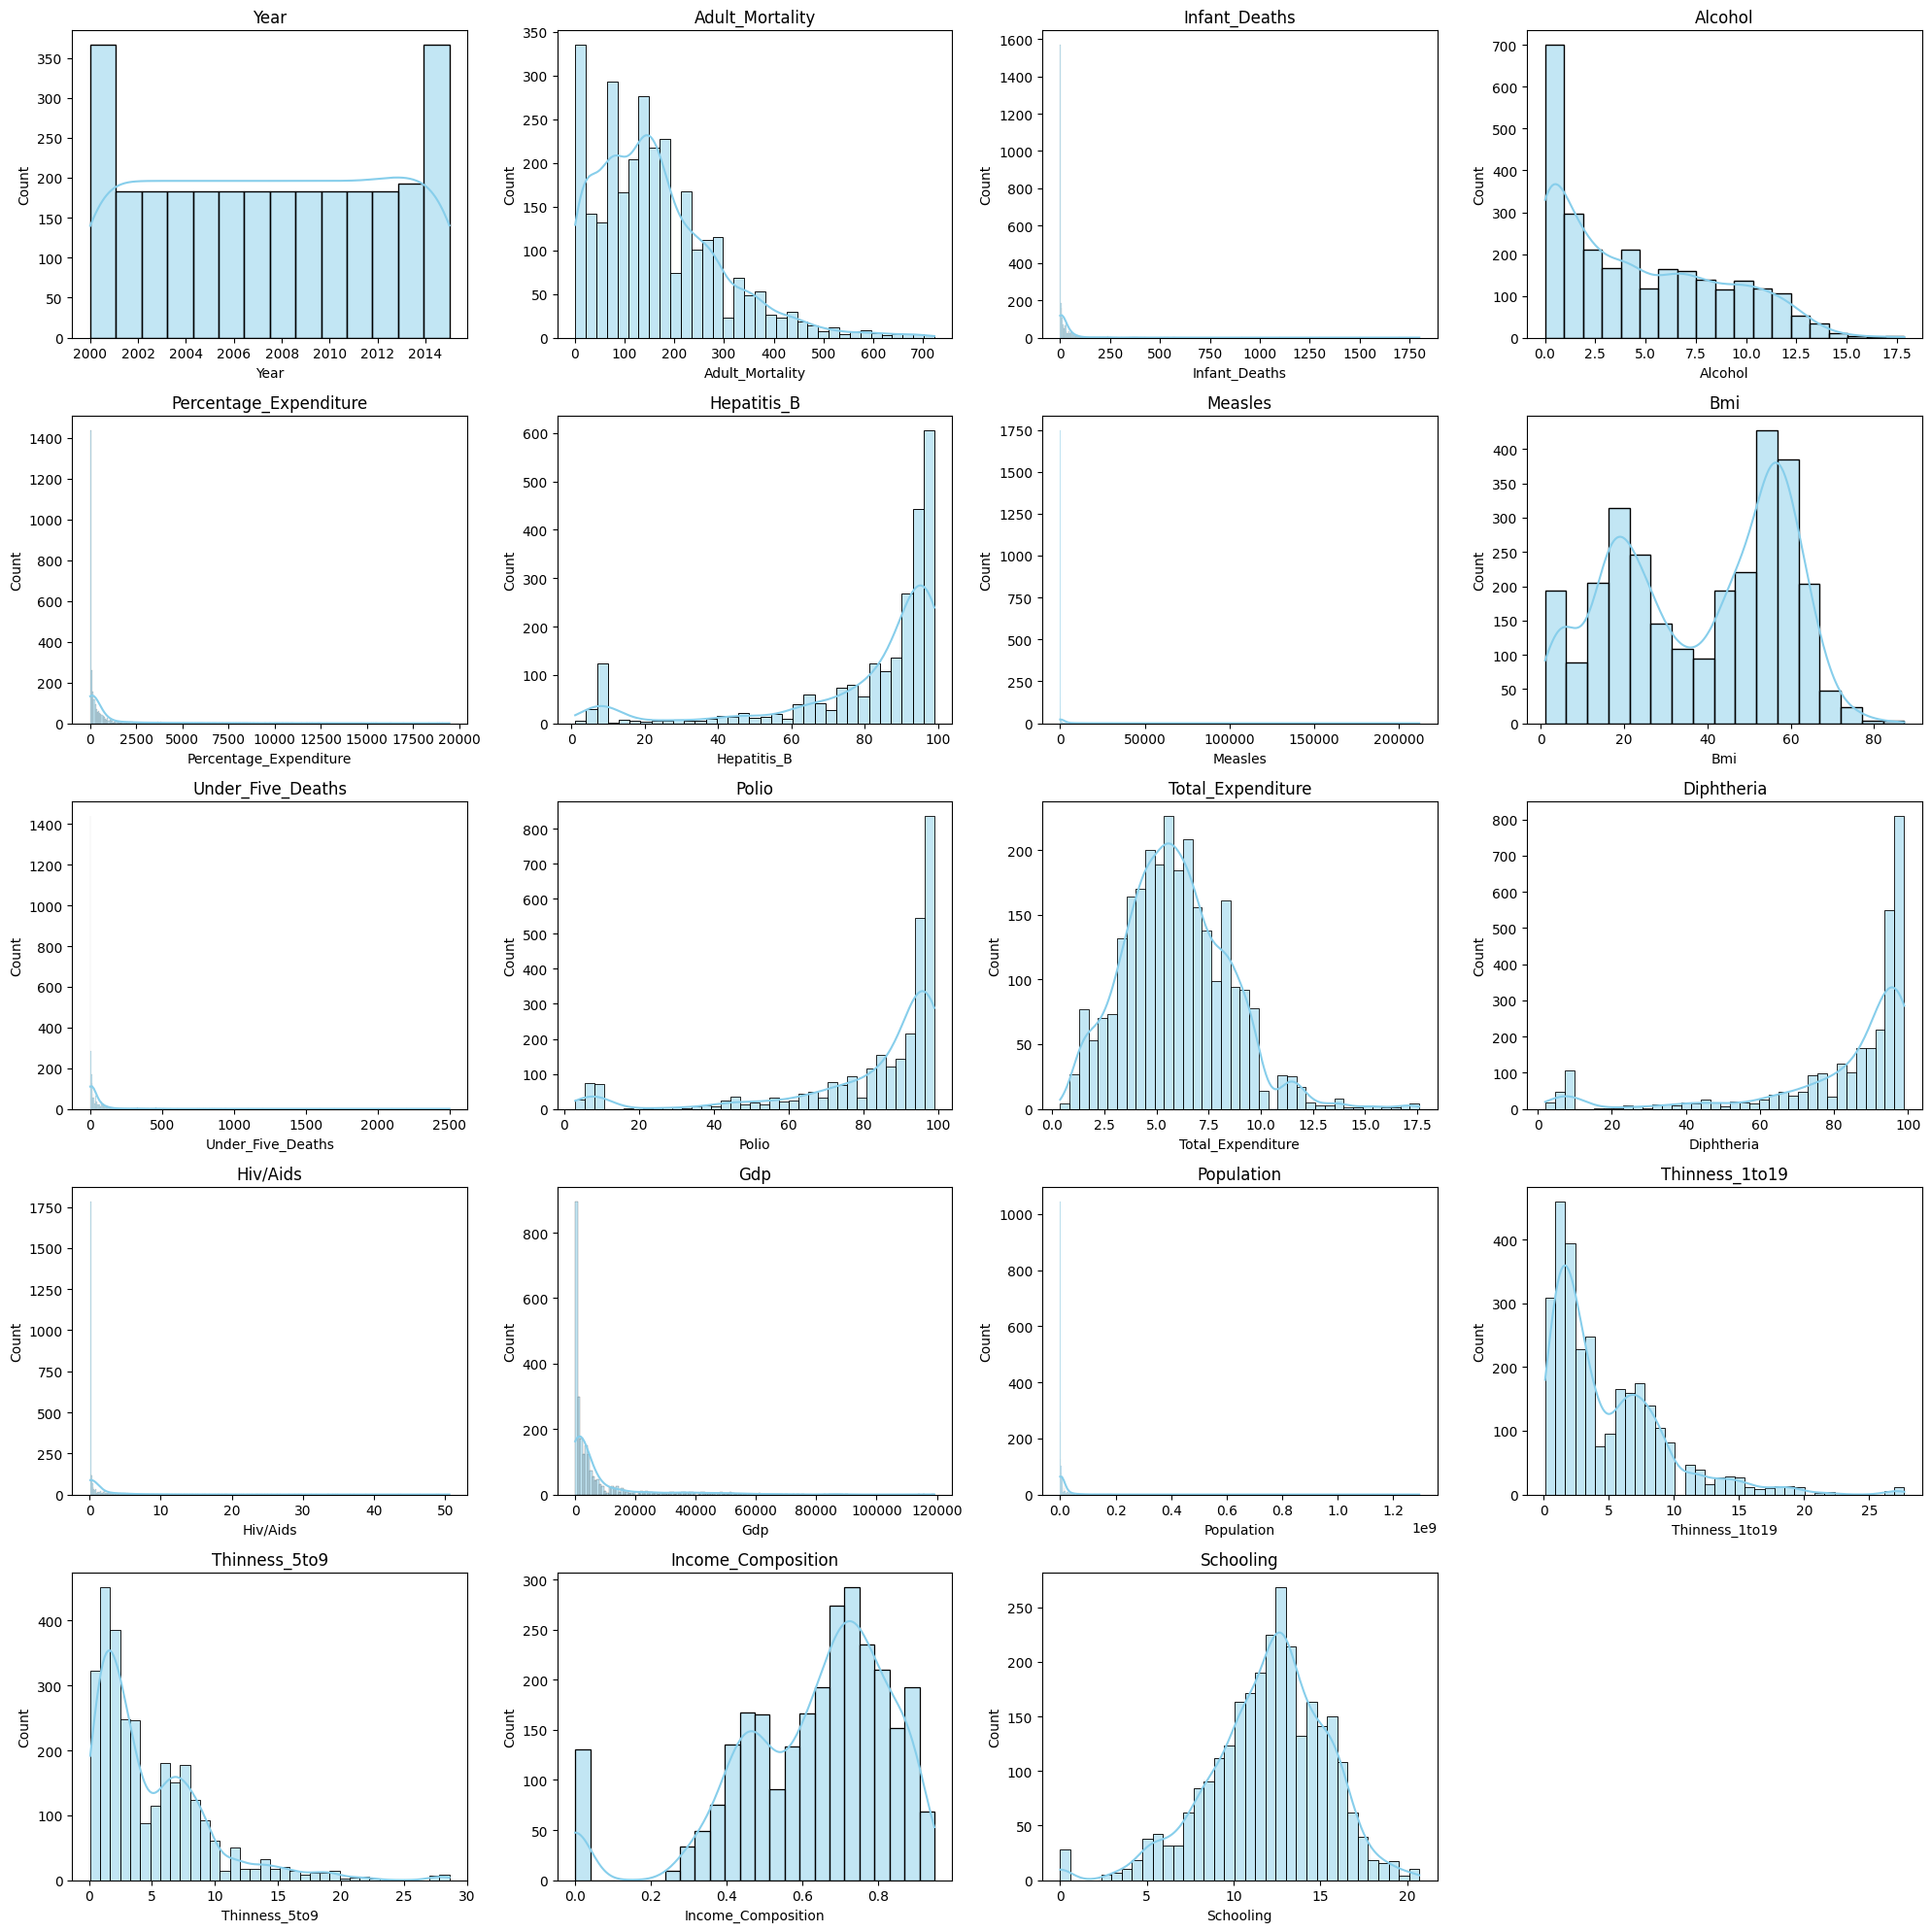

In [73]:
histograms(df, num_var)

> Many numerical features in the dataset are heavily skewed, indicating the presence of extreme values and uneven distributions across countries. Transformations are necessary to normalise highly skewed features, while outliers may require further processing.

In [30]:
def boxplots(data, var):
    numeric_cols = data[var].columns
    n_cols = 3
    n_rows = -(-len(numeric_cols) // n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=data[col], ax=axes[i], color='lightgreen')
        axes[i].set_title(f'{col}')
    
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    fig.savefig('num_box.png', dpi=300, bbox_inches='tight')
    plt.show()

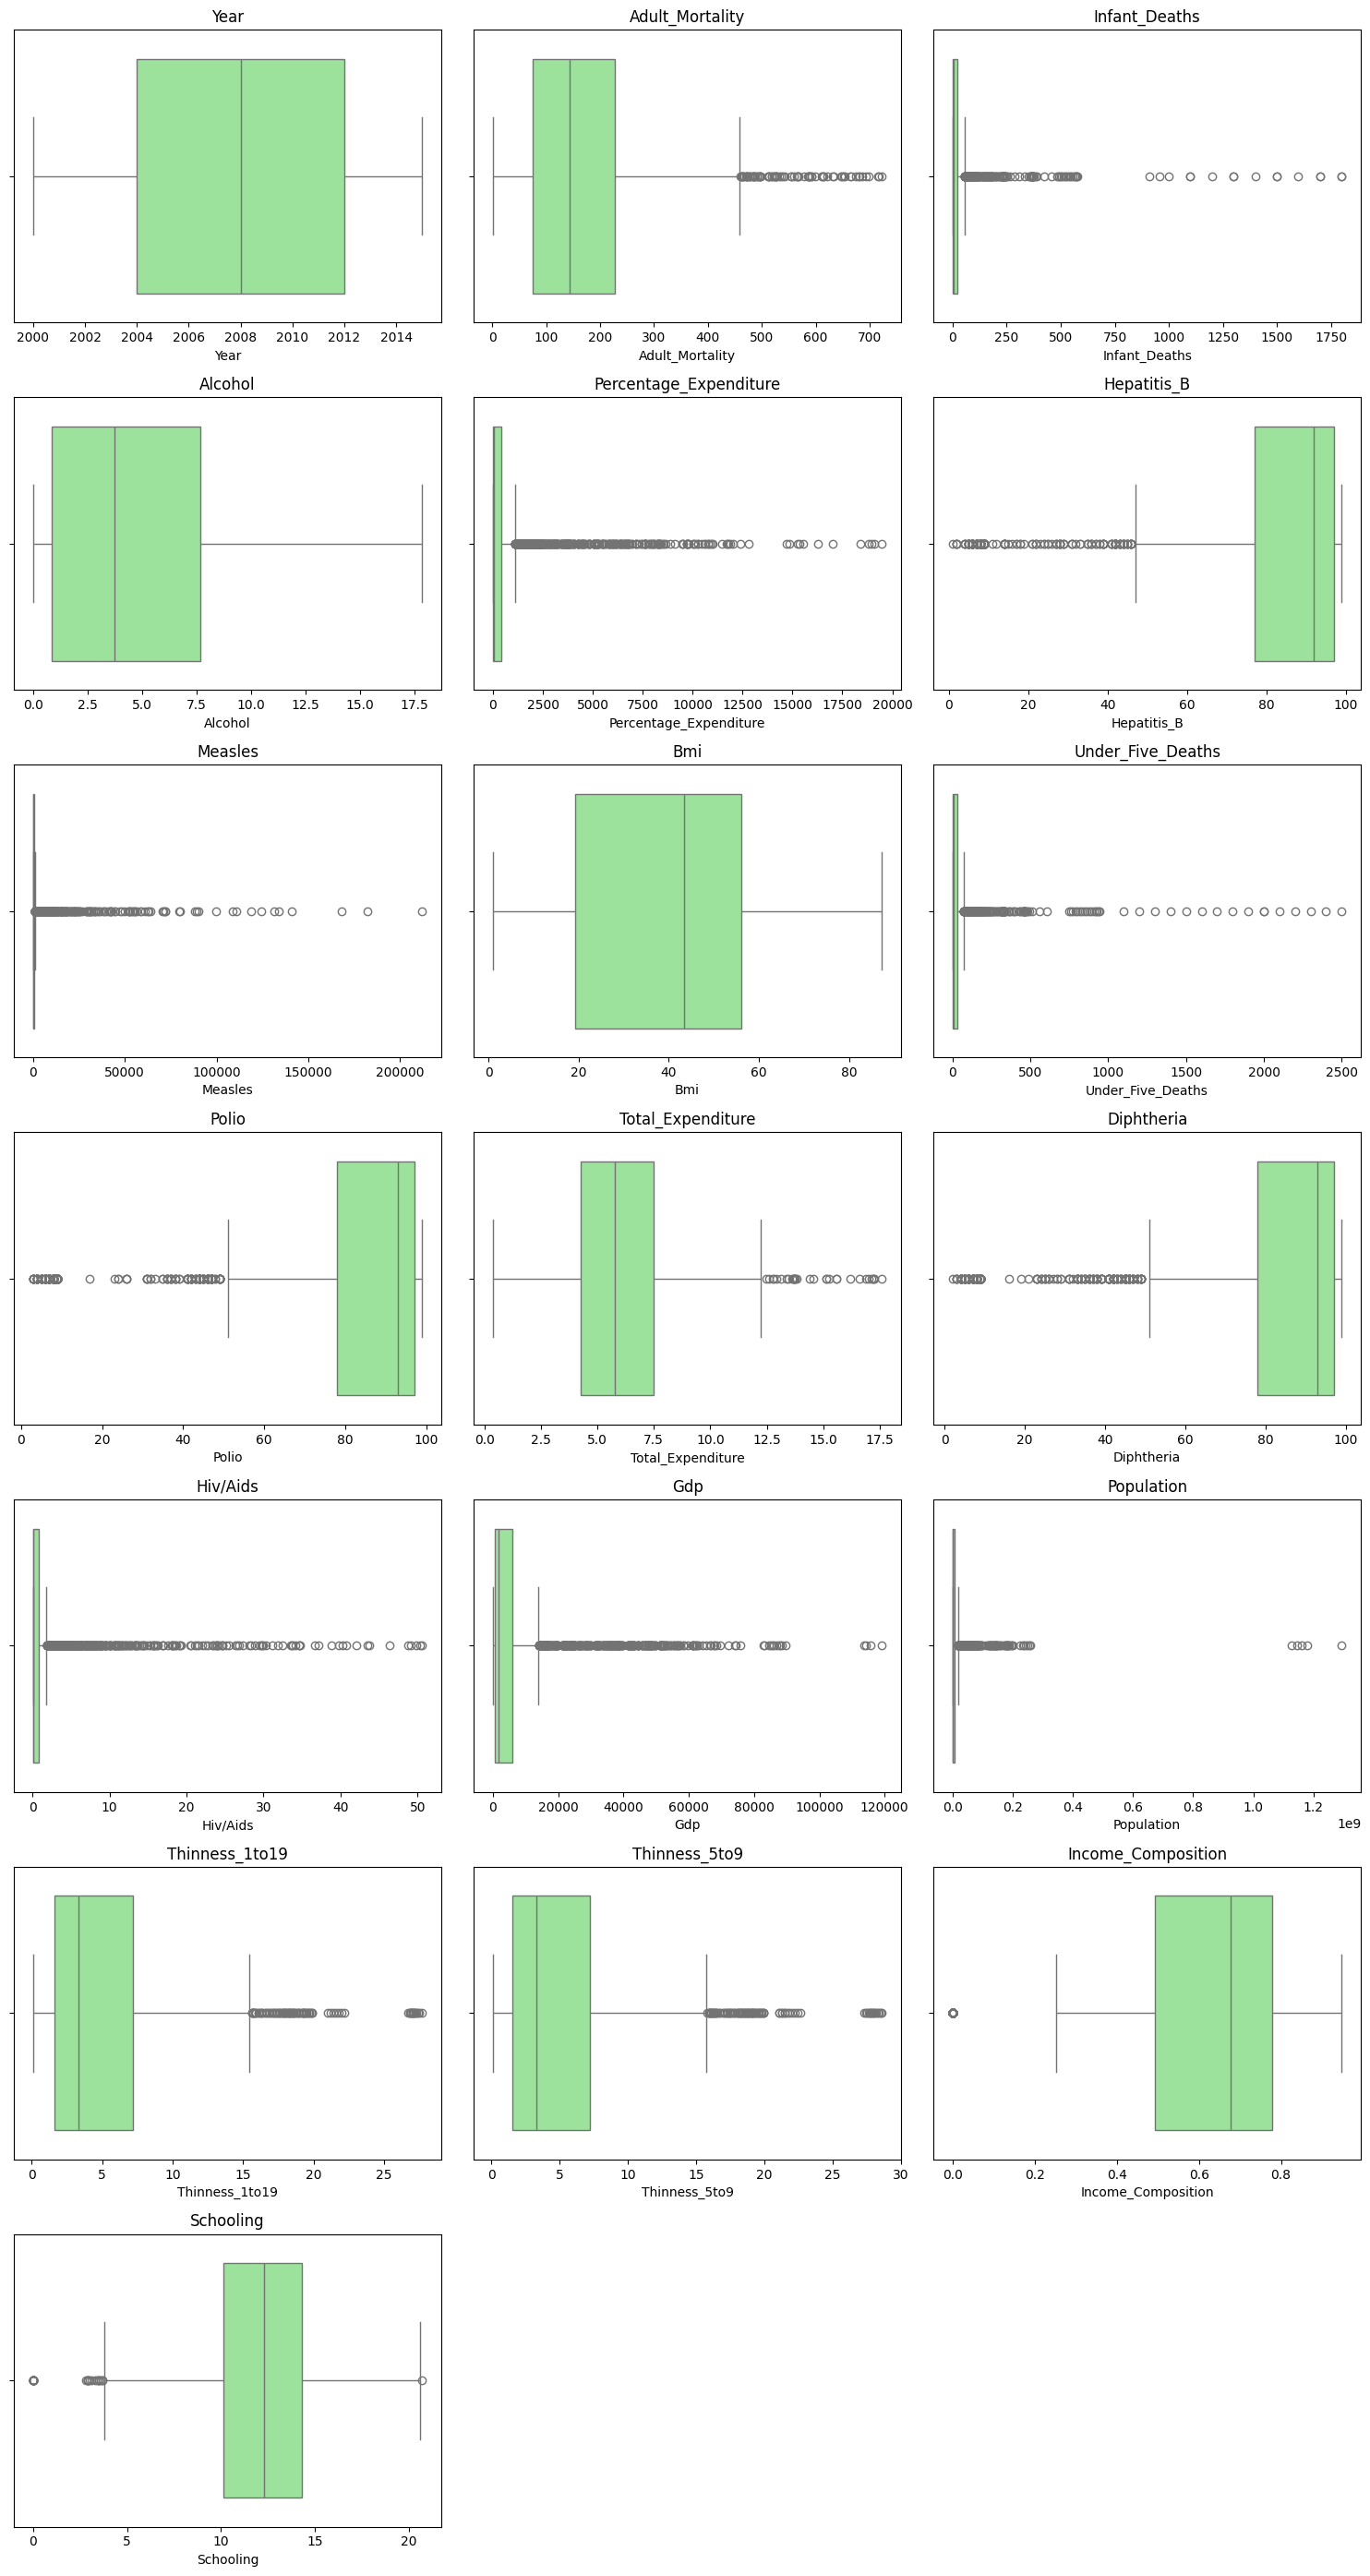

In [75]:
boxplots(df, num_var)

> Many features have extreme outliers even though they are not skewed/are extremely skewed. This warrants further transformation/robust scaling or winsorization. This means these extreme outliers will have to be capped if there are still outliers present after transformations. Skewed features are to be transformed followed by winsorization for checking. If the features are not skewed but has extreme outliers, transformation does not do much and will be skipped towards winsorization.

> This preprocessing is uniform across several models to cater both sensitive/robust models to outliers/skewness for cross validation.

#### Outliers

This is an example of treating outliers using `Adult_Mortality` feature which is right-skewed.

In [36]:
adult_mortality = df['Adult_Mortality'].dropna() # all missing columns of adult_mortality == target variable missing
log_transform = np.log(adult_mortality)
sqrt_transform = np.sqrt(adult_mortality)
boxcox_transform, _ = boxcox(adult_mortality)

print("Original Skew:", skew(adult_mortality))
print("Log Transform Skew:", skew(log_transform))
print("Sqrt Transform Skew:", skew(sqrt_transform))
print("Box-Cox Transform Skew:", skew(boxcox_transform))

Original Skew: 1.1737677783478573
Log Transform Skew: -1.2634128222065737
Sqrt Transform Skew: 0.09492968410863034
Box-Cox Transform Skew: -0.08420787382317432


Either sqrt or box-cox transform can be used to reduce the skewness to a nearly symmetric distribution.

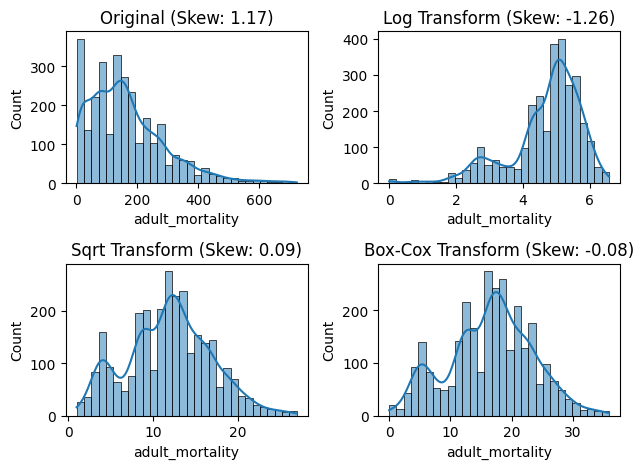

In [96]:
for i, (data, title) in enumerate([
    (adult_mortality, "Original"),
    (log_transform, "Log Transform"),
    (sqrt_transform, "Sqrt Transform"),
    (boxcox_transform, "Box-Cox Transform")
]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data, kde=True, bins=30)
    plt.title(f"{title} (Skew: {skew(data):.2f})")
    plt.xlabel('adult_mortality')

plt.tight_layout()
plt.show()

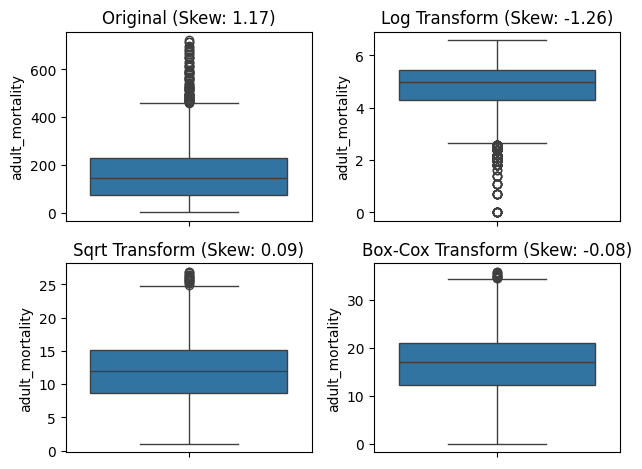

In [97]:
for i, (data, title) in enumerate([
    (adult_mortality, "Original"),
    (log_transform, "Log Transform"),
    (sqrt_transform, "Sqrt Transform"),
    (boxcox_transform, "Box-Cox Transform")
]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data)
    plt.title(f"{title} (Skew: {skew(data):.2f})")
    plt.ylabel('adult_mortality')

plt.tight_layout()
plt.show()

While transformation can fix the skewness, there are severe outliers in the feature which need to be capped using winsorization. Simply dropping the rows that contain outliers can eliminate possible useful information for the model to use.

In [38]:
def winsorize(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return lower, upper

In [39]:
winsor_adult_mortality = winsorize(pd.DataFrame({'Adult_Mortality': boxcox_transform}), 'Adult_Mortality')
tmp_adult_mortality = np.clip(boxcox_transform, winsor_adult_mortality[0], winsor_adult_mortality[1])
tmp_adult_mortality

array([22.60310283, 22.92160991, 22.80281375, ..., 12.15341462,
       34.49267589, 34.49267589], shape=(2928,))

In [40]:
boxcox_transform.min(), boxcox_transform.max()

(np.float64(0.0), np.float64(35.93270124267168))

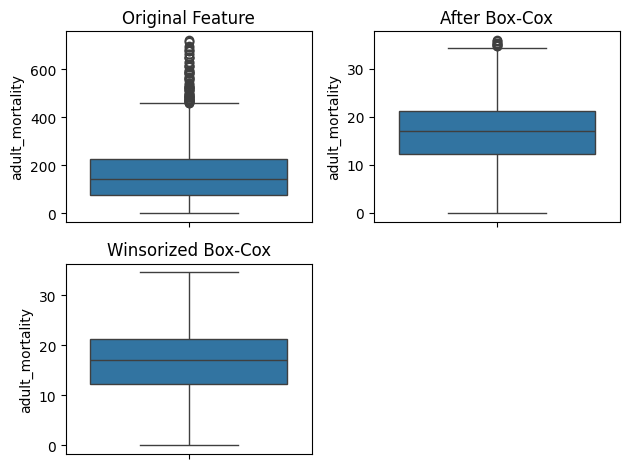

In [41]:
for i, (data, title) in enumerate([
    (df['Adult_Mortality'], "Original Feature"),
    (boxcox_transform, "After Box-Cox"),
    (tmp_adult_mortality, "Winsorized Box-Cox")
]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data)
    plt.title(f'{title}')
    plt.ylabel('adult_mortality')

plt.tight_layout()
plt.show()

> Winsor method caps the outliers as shown in the boxplot

#### Correlation/Multicollinearity

> Correlation of features to target and correlation between features need to be determined in order to detect multicollinearity (features that are considered redundant due to high correlation between independent variables). If there are multicollinearity in the features then it will undermine the statistical significance of a feature.

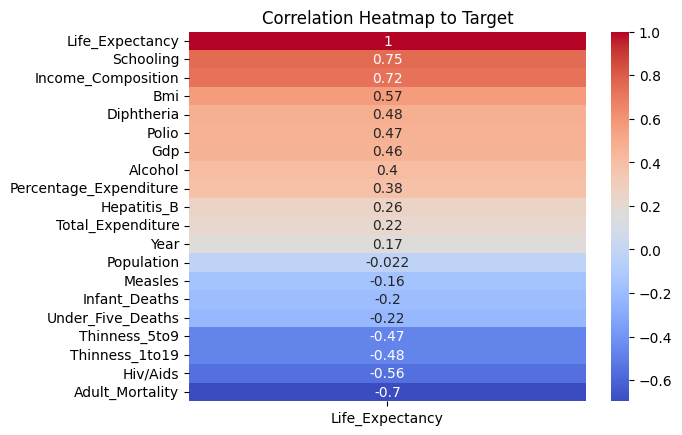

In [186]:
corr_to_target = df.corr(numeric_only=True)['Life_Expectancy'].sort_values(ascending=False)
sns.heatmap(corr_to_target.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap to Target')
plt.savefig('correlation_to_target.png', dpi=300, bbox_inches='tight')
plt.show()

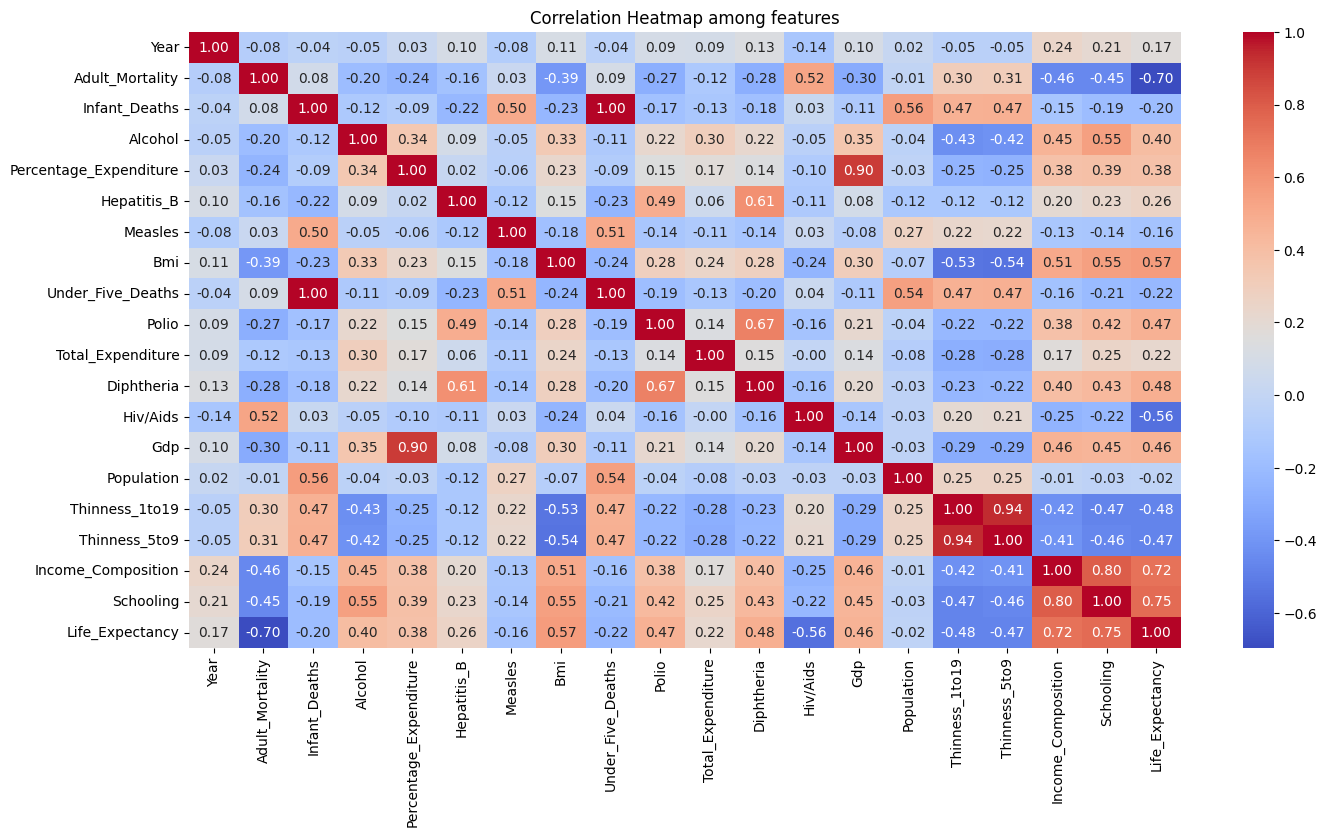

In [187]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap among features')
plt.savefig('correlation_bw_feat.png', dpi=300, bbox_inches='tight')
plt.show()

> Low correlation to the target does not mean it's a useless feature, and `feature_importances_` is still needed. If a feature is highly correlated with another feature then it is going to get dropped based on how important the feature or how redundant it is. 

In [189]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[num_var].dropna()
X_const = add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i + 1) for i in range(X.shape[1])]
print(vif.sort_values(by="VIF", ascending=False))

                   Feature         VIF
2            Infant_Deaths  213.609554
8        Under_Five_Deaths  203.591034
13                     Gdp   13.649710
4   Percentage_Expenditure   12.904426
15          Thinness_1to19    7.606109
16           Thinness_5to9    7.584832
18               Schooling    3.538093
17      Income_Composition    3.028945
11              Diphtheria    2.094307
3                  Alcohol    2.067310
14              Population    1.943421
1          Adult_Mortality    1.809171
7                      Bmi    1.802986
9                    Polio    1.722414
5              Hepatitis_B    1.680406
6                  Measles    1.516630
12                Hiv/Aids    1.500870
0                     Year    1.157920
10       Total_Expenditure    1.124370


> The VIF (variance inflation factor) confirms the multicollinearity from the correlation heatmap. >10 VIF means features are linearly predictable by the other. Depending on the feature importances of these individually to the model, one can be dropped whoever has the lower feature importance.

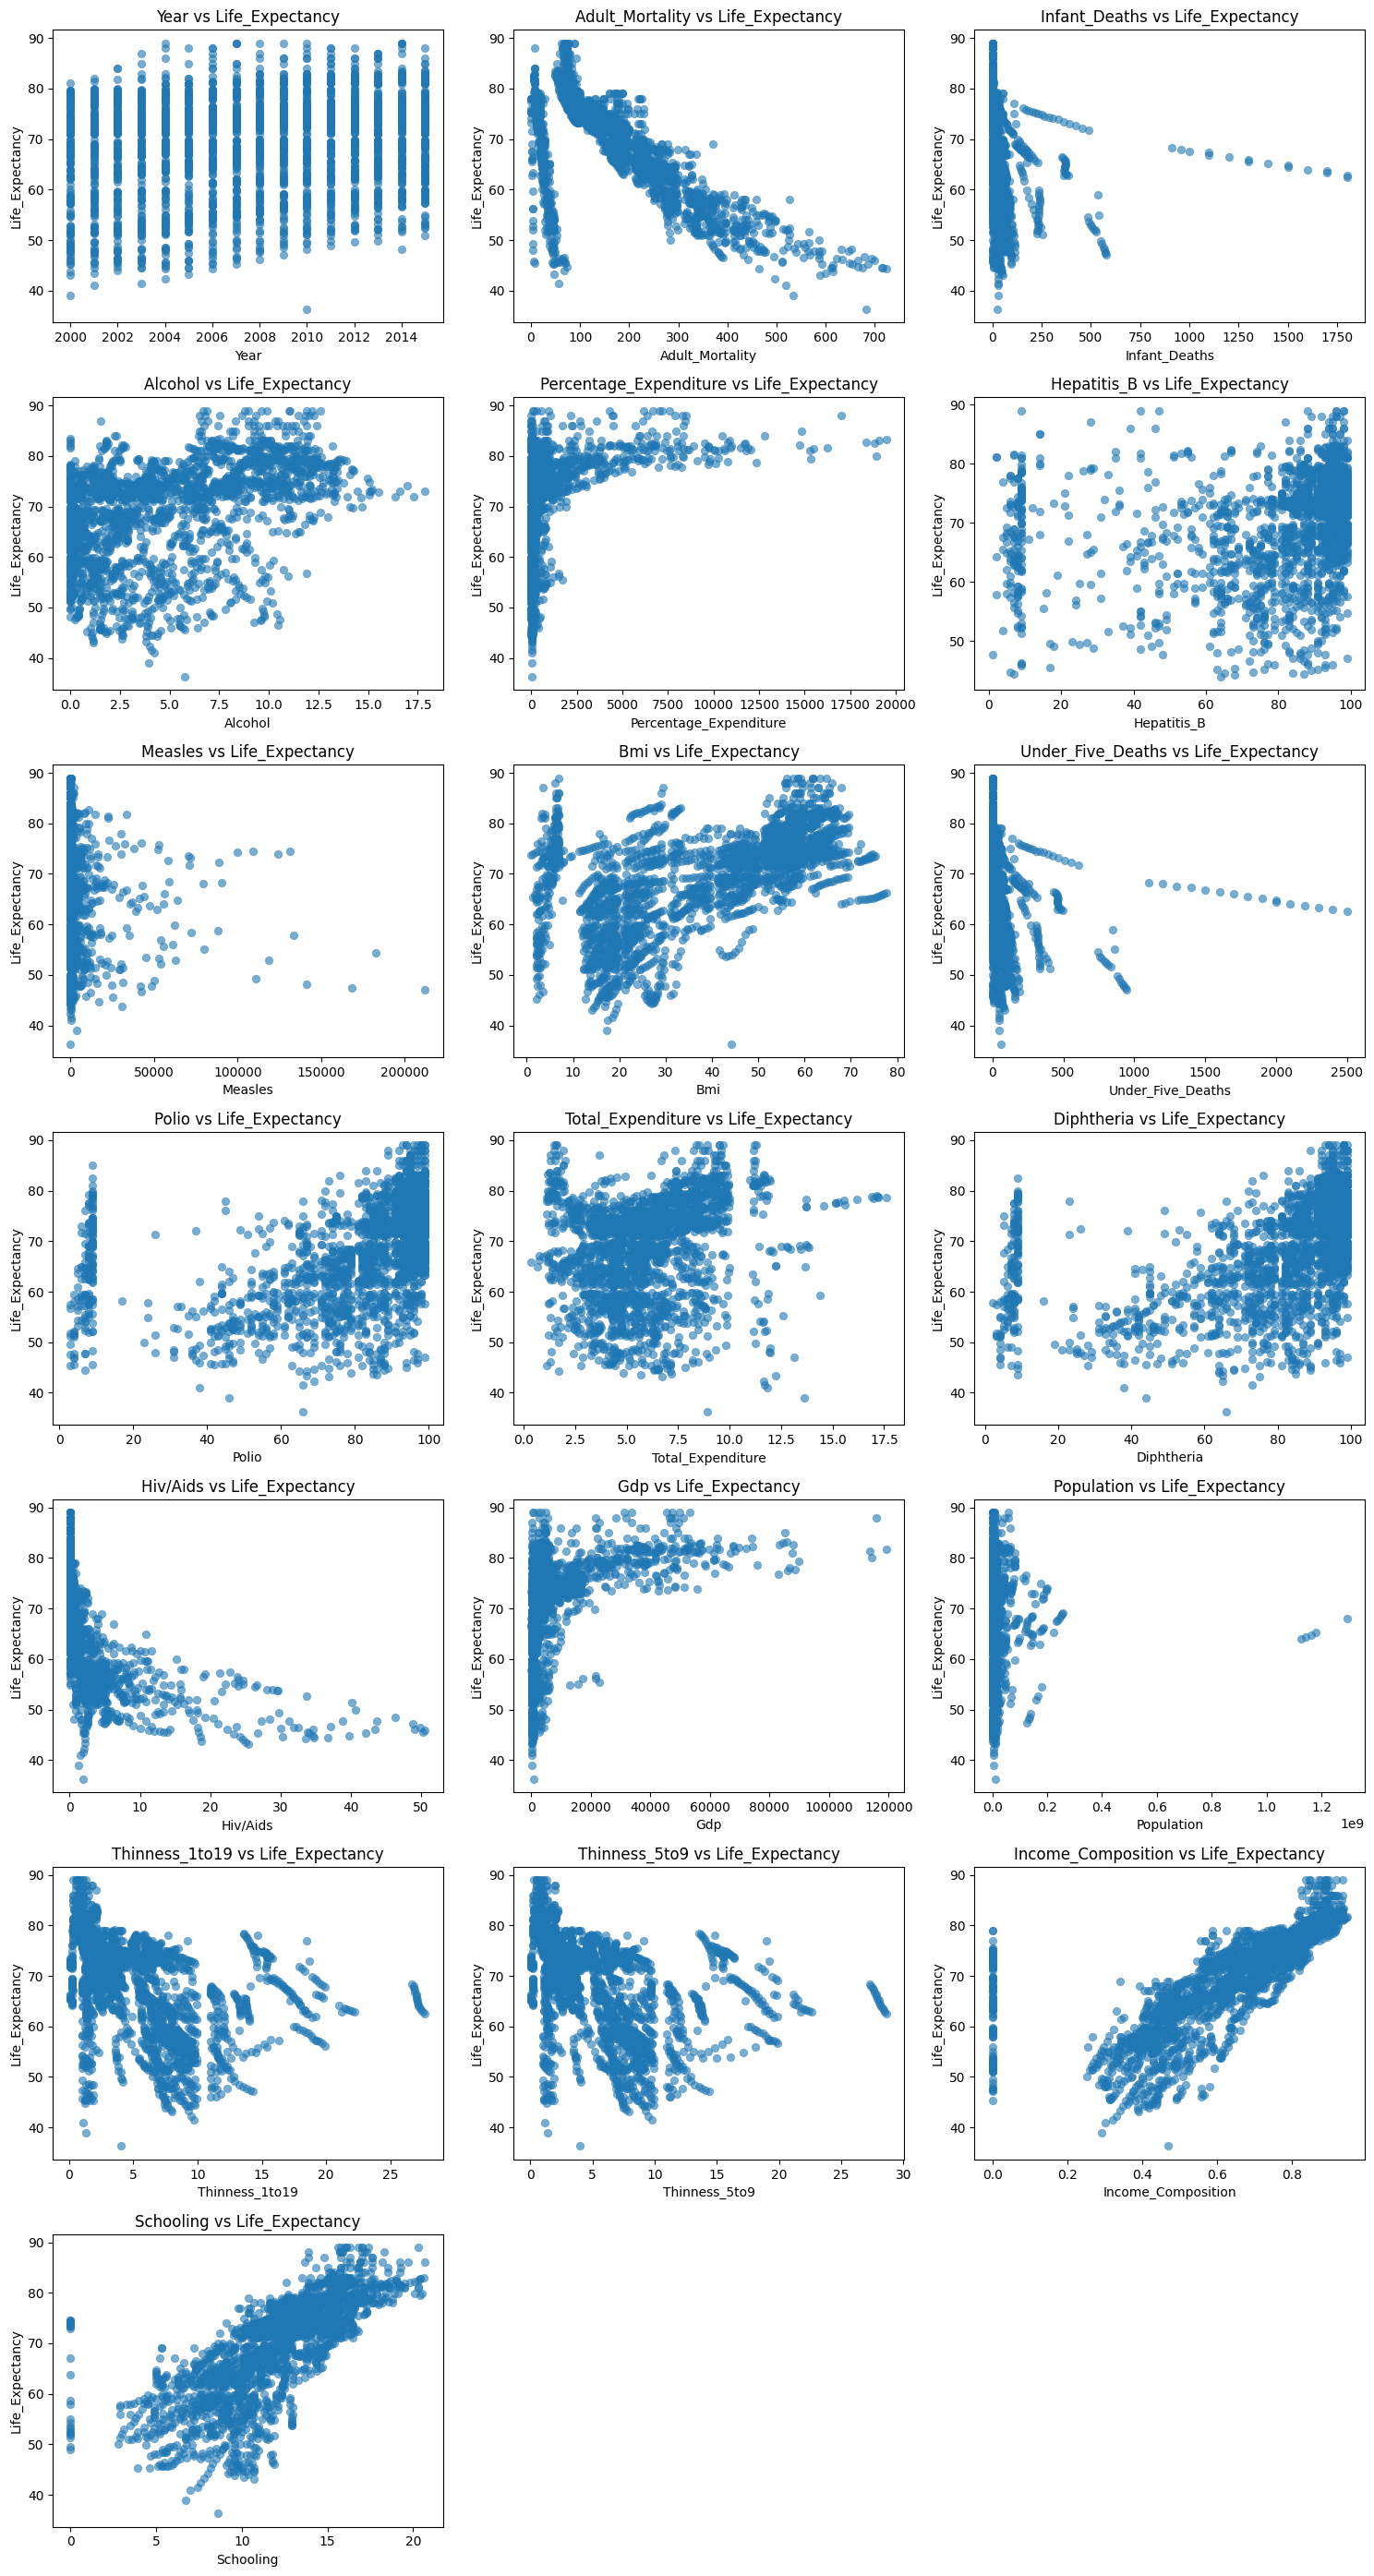

In [201]:
num_col = df[num_var].columns
n_col = 3
n_row = -(-len(num_col) // n_col)

plt.figure(figsize=(n_col * 5, n_row * 4))

for i, feature in enumerate(num_col, 1):
    plt.subplot(n_row, n_col, i)
    sns.scatterplot(data=df, x=feature, y='Life_Expectancy', alpha=0.6, edgecolor=None)
    #sns.regplot(data=df, x=feature, y='Life_Expectancy', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'{feature} vs Life_Expectancy')

plt.tight_layout()
plt.show()

> The scatterplots visualise both linear and nonlinear relationships between features and the target. This gives a better view of the data points distribution across different levels of life expectancy

#### Categorical features

In [54]:
cat_var = [var for var in df.columns if var not in num_var and var != TARGET_VAR]
cat_var

['Country', 'Status']

> There are only 2 columns that are categorical and both are nominal (without order in nature)

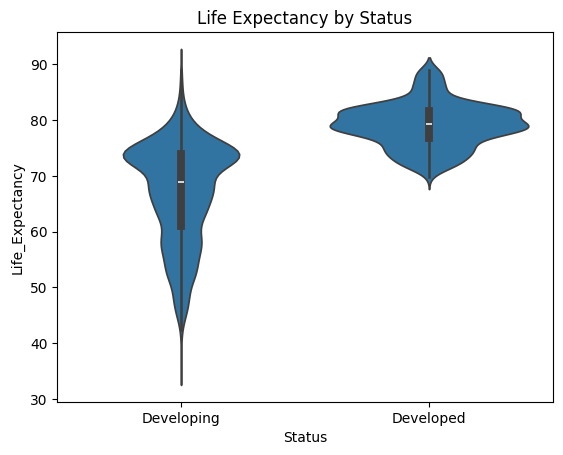

In [213]:
sns.violinplot(data=df, x='Status', y='Life_Expectancy')
plt.title('Life Expectancy by Status')
plt.show()

> The violinplot shows the distribution between different status. Developing countries has more variability and dense towards 70-75, while developed countries are more compact and wider at 78-82 levels. The long tail on Developing status indicates some low outliers (countries with really low life expectancy) that fall beyond the IQR.

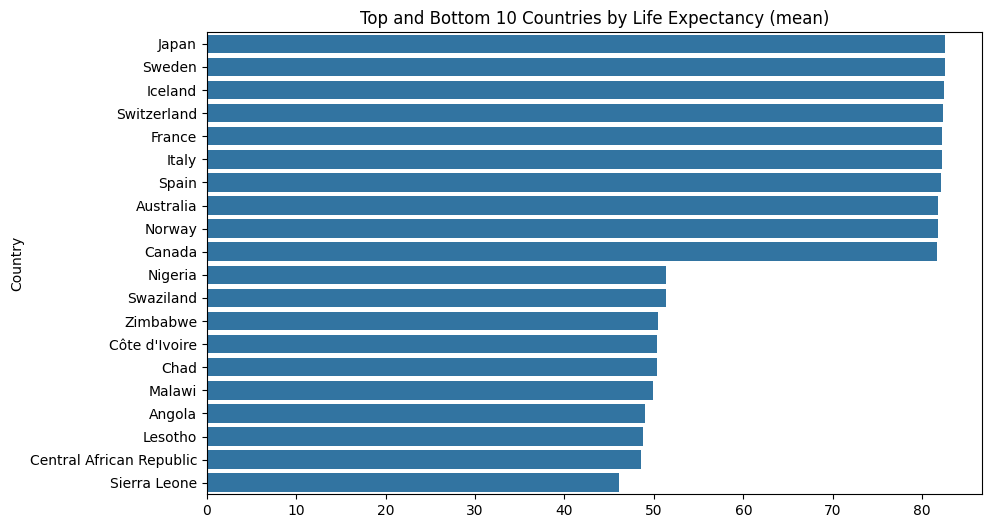

In [237]:
lfexp_clean = df.copy()
lfexp_clean = lfexp_clean.dropna(subset=['Life_Expectancy'])
country_life_mean = lfexp_clean.groupby('Country')['Life_Expectancy'].mean().sort_values(ascending=False)
top_bottom = pd.concat([country_life_mean.head(10), country_life_mean.tail(10)])

plt.figure(figsize=(10, 6))
sns.barplot(x=top_bottom.values, y=top_bottom.index)
plt.title('Top and Bottom 10 Countries by Life Expectancy (mean)')
plt.show()

#### Cardinality

In [207]:
len(df['Country'].unique())

193

In [ ]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

> The raw data contains 193 countries and they are either Developing or Developed. For high cardinality columns like the `Country` column, frequency encoding or target mean encoding is the most appropriate. Using one hot encoding creates very wide/sparse matrices which increase the dimensionality, slow down the training, and lead to overfitting.

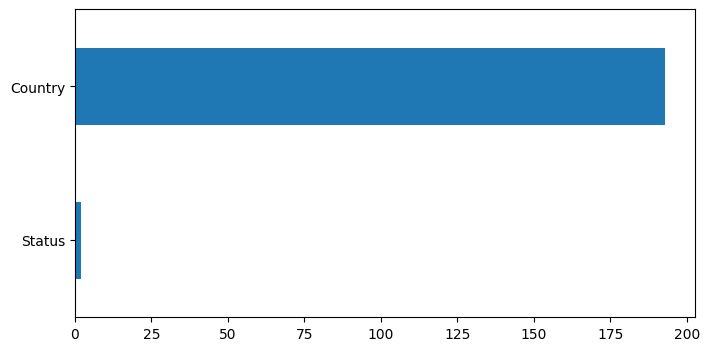

In [ ]:
df[cat_var].nunique().sort_values().plot(kind='barh', figsize=(8,4))
plt.show()

In [45]:
tmp = df.copy()
tmp = tmp.dropna(subset=['Life_Expectancy'])
len(tmp['Country'].unique())

183

> Removing the NaN values for the target label Life_Expectancy will only leave 183 unique countries

### Countries with a feature FULLY NULL

> This shows countries that have a feature which are completely missing. Imputation based on Status (Developing/Developed) for each feature with full missing values is a possible way of filling the empty values.

In [46]:
nan_feat_country = tmp.groupby('Country')[num_var].apply(lambda x: x.isna().all())
missing_feat_df = nan_feat_country[nan_feat_country.any(axis=1)]
missing_feat_df = missing_feat_df.loc[:, missing_feat_df.any(axis=0)]
missing_feat_df

,Alcohol,Hepatitis_B,Bmi,Total_Expenditure,Gdp,Population,Thinness_1to19,Thinness_5to9,Income_Composition,Schooling
Country,,,,,,,,,,
Antigua and Barbuda,False,False,False,False,False,True,False,False,False,False
Bahamas,False,False,False,False,True,True,False,False,False,False
Bahrain,False,False,False,False,False,True,False,False,False,False
Barbados,False,False,False,False,False,True,False,False,False,False
Bolivia (Plurinational State of),False,False,False,False,True,True,False,False,False,False
Brunei Darussalam,False,False,False,False,False,True,False,False,False,False
Congo,False,False,False,False,True,True,False,False,False,False
Cuba,False,False,False,False,False,True,False,False,False,False
Czechia,False,False,False,False,True,True,False,False,True,True


> this shows the countries and which features are completely NULL for that country. Different methods of imputation apply depending on the level and coverage of missing data. Simply imputing the data without distinction produces inconsistent values which do not reflect the true variance and nature of the data for each country

In [47]:
missing_feat_df.columns

Index(['Alcohol', 'Hepatitis_B', 'Bmi', 'Total_Expenditure', 'Gdp',
       'Population', 'Thinness_1to19', 'Thinness_5to9', 'Income_Composition',
       'Schooling'],
      dtype='object')

In [48]:
missing_num = [var for var in tmp.columns if tmp[var].isnull().sum() > 0 and tmp[var].dtype != 'O']
missing_num

['Alcohol',
 'Hepatitis_B',
 'Bmi',
 'Polio',
 'Total_Expenditure',
 'Diphtheria',
 'Gdp',
 'Population',
 'Thinness_1to19',
 'Thinness_5to9',
 'Income_Composition',
 'Schooling']

In [49]:
print(len(missing_feat_df.columns.tolist()))
print(len(missing_num))

10
12


> There are columns that are not completely NULL for each country so there will be different imputation methods based on their coverage.